#Predicting Heart Failure with Machine Learning Techniques

##1.Project Overview

Cardiovascular diseases (CVDs) are a significant global health concern, leading to millions of deaths annually. Among the severe consequences of CVDs, heart failure stands out as a critical condition requiring early intervention and management. Accurate prediction of heart failure can greatly enhance preventative measures and treatment outcomes, ultimately saving lives.

This study aims to develop a robust machine learning model to predict heart failure based on various clinical and demographic features. By leveraging advanced data analytics and machine learning techniques, we aim to identify individuals at high risk of heart failure, facilitating timely medical intervention and improving patient prognosis.

##2.Data Information

## Variable Description

The dataset used in this study contains 918 observations and 11 features related to cardiovascular health:

* Age: Age of the patient [years]
* Sex: Sex of the patient [M: Male, F: Female]
* ChestPainType: Type of chest pain [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: Resting blood pressure [mm Hg]
* Cholesterol: Serum cholesterol [mg/dl]
* FastingBS: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: Maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: Exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

##3.Data Inspecting and Preprocessing

In [ ]:
!pip install catboost

In [ ]:
!pip install logitboost

In [ ]:
!pip install dask[dataframe]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
from logitboost import LogitBoost
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [ ]:
# Loading the dataset
file_path = 'heart.csv'
df = pd.read_csv(file_path)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Checking the shape of the dataset
df.shape

(918, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
# Checking for null/missing values
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
# Check for uniqueness in each column
df.nunique()

,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


In [ ]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


##4.Exploratory Data Analysis (EDA)


### Target Variable: HeartDisease

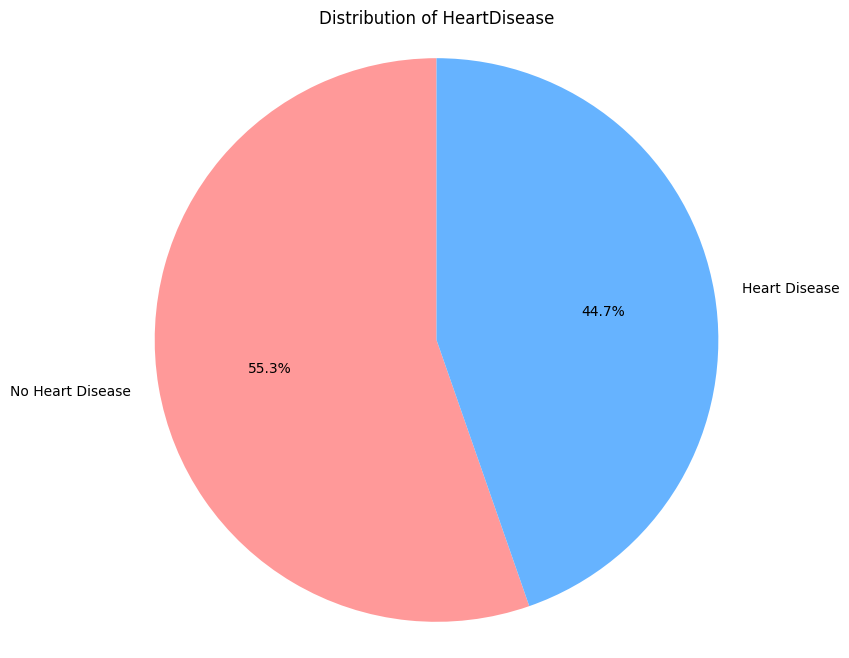

In [ ]:
# Plotting pie chart for the target variable 'HeartDisease'
heart_disease_counts = df['HeartDisease'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(heart_disease_counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of HeartDisease')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The dataset appears to be relatively balanced between individuals with heart disease and those without, though there is a slightly larger proportion of individuals without heart disease (55.3% vs. 44.7%).

###Age

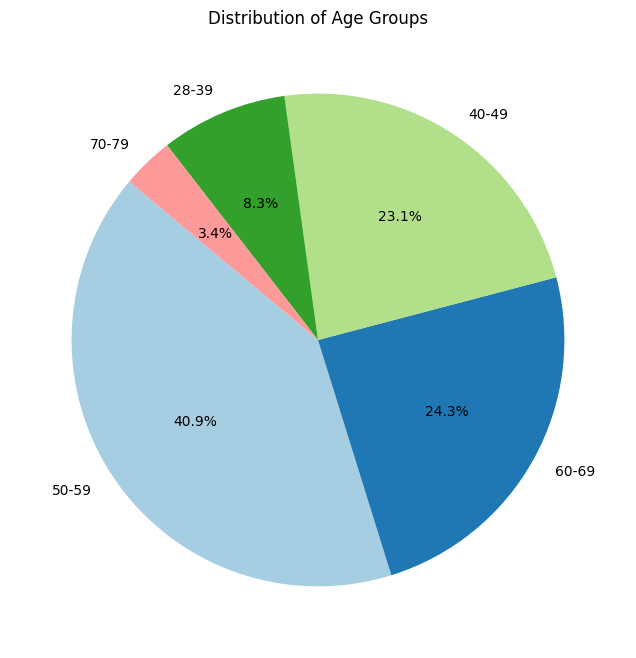

In [ ]:
# Categorizing Age into groups for better visualization in a pie chart
age_groups = pd.cut(df['Age'], bins=[29, 39, 49, 59, 69, 79], labels=['28-39', '40-49', '50-59', '60-69', '70-79'])

# Counting occurrences of each age group
age_counts = age_groups.value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
age_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Distribution of Age Groups')
plt.ylabel('')  # Hide the y-label
plt.show()

The dataset is heavily skewed towards the middle-aged groups (50-59 and 60-69), which together make up approximately 65.2% of the population.
There are significantly fewer individuals in the younger (28-39) and older (70-79) age groups.

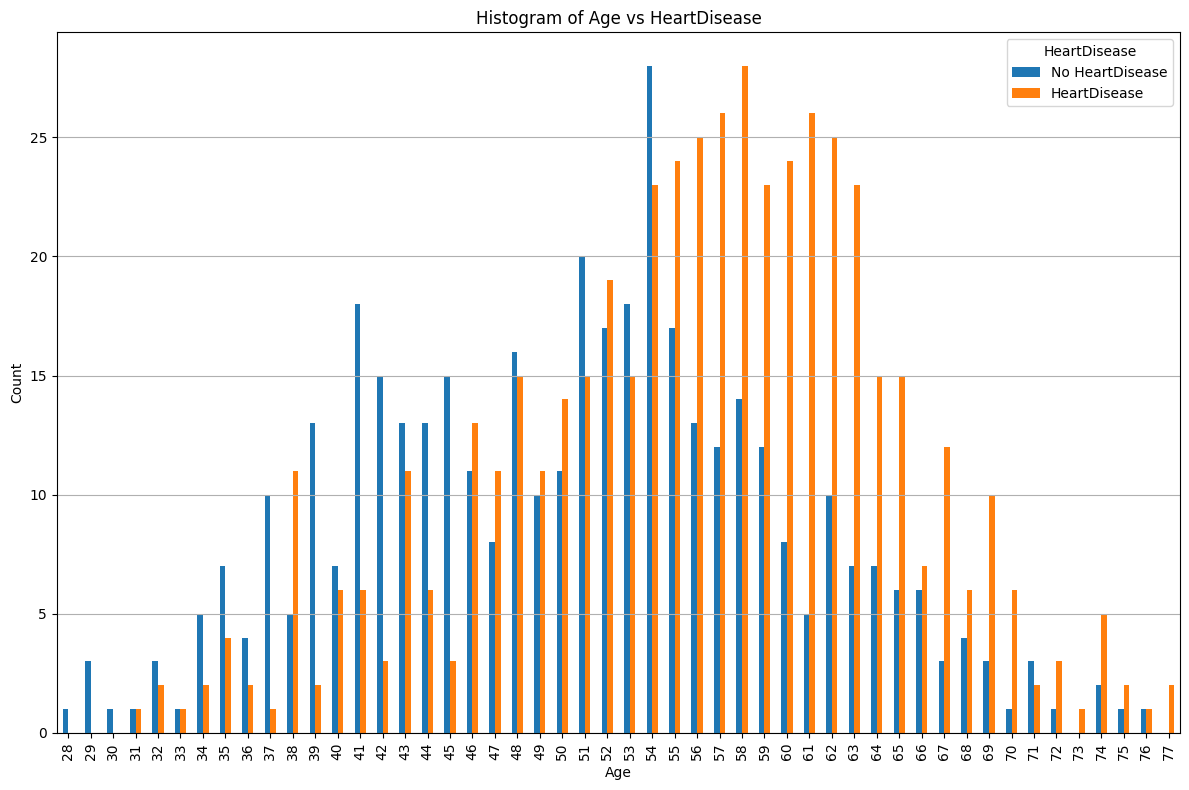

In [ ]:
# Plotting a histogram for Age vs. HeartDisease
plt.figure(figsize=(12, 8))

# Grouping by Age and HeartDisease and counting occurrences
age_heartdisease = df.groupby(['Age', 'HeartDisease']).size().unstack(fill_value=0)

# Plotting the histogram
age_heartdisease.plot(kind='bar', stacked=False, ax=plt.gca(), color=['#1f77b4', '#ff7f0e'])

plt.title('Histogram of Age vs HeartDisease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='HeartDisease', labels=['No HeartDisease', 'HeartDisease'])
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Age is a significant factor in heart disease prevalence. The likelihood of heart disease increases with age, especially from the mid-50s onward.Younger individuals (under 40) are generally less affected by heart disease.

Therefore, preventive measures and monitoring might be especially important for individuals entering their 50s, as this is where the data shows a marked increase in heart disease cases.

###Sex

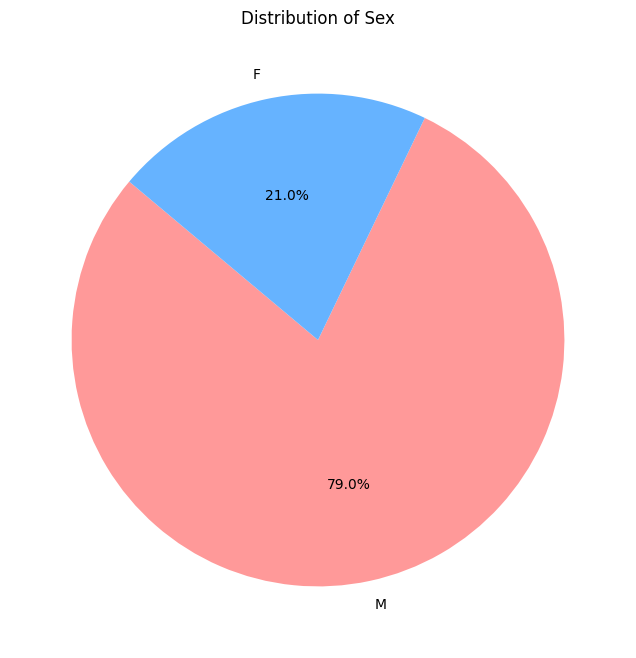

In [ ]:
# Plotting a pie chart for the distribution of Sex
plt.figure(figsize=(8, 8))

# Counting occurrences of each sex
sex_counts = df['Sex'].value_counts()

# Plotting the pie chart
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])

plt.title('Distribution of Sex')
plt.ylabel('')  # Hide the y-label
plt.show()


M(Male) represents 79.0% of the total individuals in the dataset. This indicates that a significant majority of the dataset consists of male individuals.
F(Female) represents 21.0% of the total individuals in the dataset. This is a much smaller proportion compared to the male group.

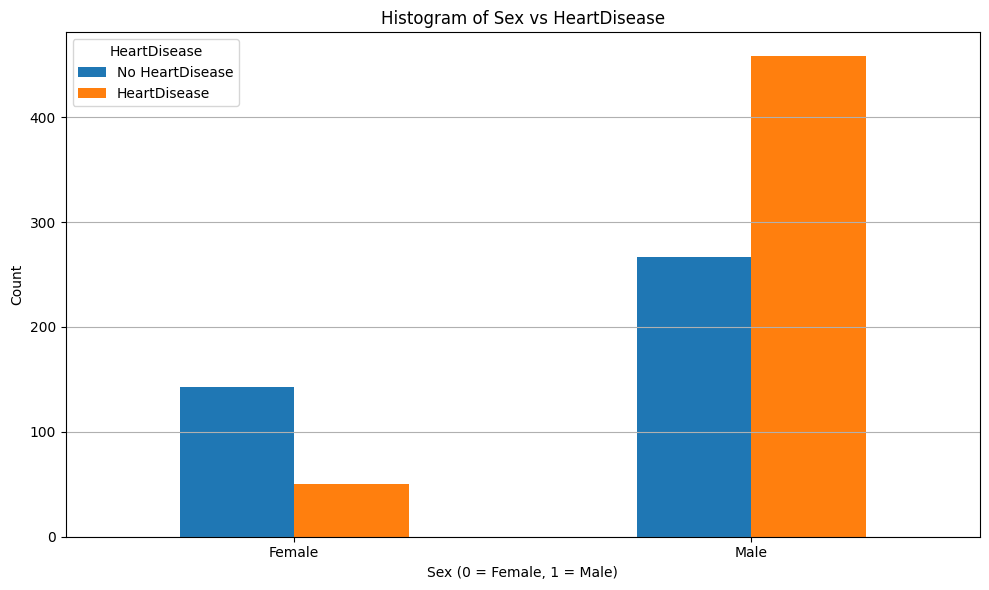

In [ ]:
# Plotting histogram of Sex vs HeartDisease
plt.figure(figsize=(10, 6))

# Grouping by Sex and HeartDisease and counting occurrences
sex_heartdisease = df.groupby(['Sex', 'HeartDisease']).size().unstack()

# Plotting the histogram
sex_heartdisease.plot(kind='bar', stacked= False, color=['#1f77b4', '#ff7f0e'], ax=plt.gca())

plt.title('Histogram of Sex vs HeartDisease')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.legend(title='HeartDisease', labels=['No HeartDisease', 'HeartDisease'])
plt.grid(axis='y')

plt.tight_layout()
plt.show()

The histogram indicates a higher prevalence of heart disease among males compared to females in the dataset. Males not only outnumber females in the dataset, but they also have a higher count of heart disease cases. Therefore, this observation could imply that sex is a significant factor in heart disease risk.

###ChestPainType

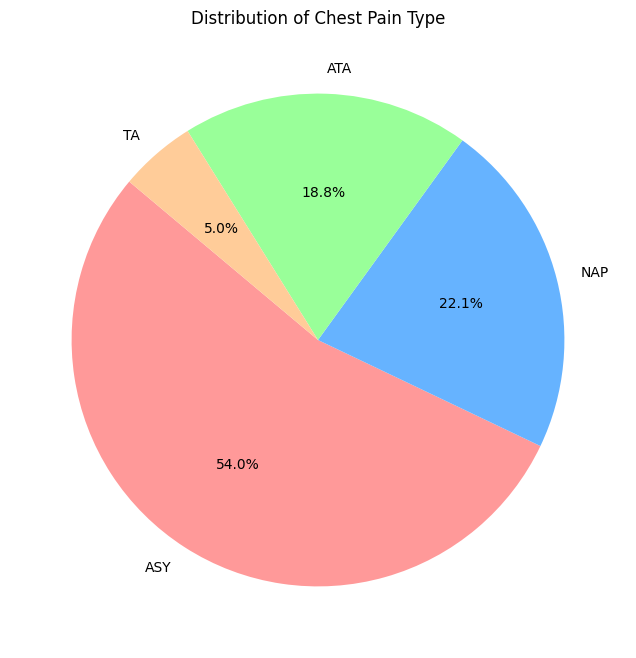

In [ ]:
# Plotting a pie chart for the distribution of ChestPainType
plt.figure(figsize=(8, 8))

# Counting occurrences of each chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
chest_pain_counts = df['ChestPainType'].value_counts()

# Plotting the pie chart
chest_pain_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

plt.title('Distribution of Chest Pain Type')
plt.ylabel('')  # Hide the y-label
plt.show()

Asymptomatic (ASY) is the dominant chest pain type, representing more than half of the cases in the dataset. This suggests that a significant proportion of individuals in this dataset may have conditions or risk factors for heart disease without experiencing typical chest pain symptoms.
Non-Anginal Pain (NAP) and Atypical Angina (ATA) are also relatively common, indicating that many individuals experience chest pain that is either not related to heart disease or is less predictable.
Typical Angina (TA) is the least common, representing only a small fraction of the cases.

Therefore, the prevalence of Asymptomatic cases might suggest a need for careful monitoring and diagnostic evaluation, even in the absence of symptoms.

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

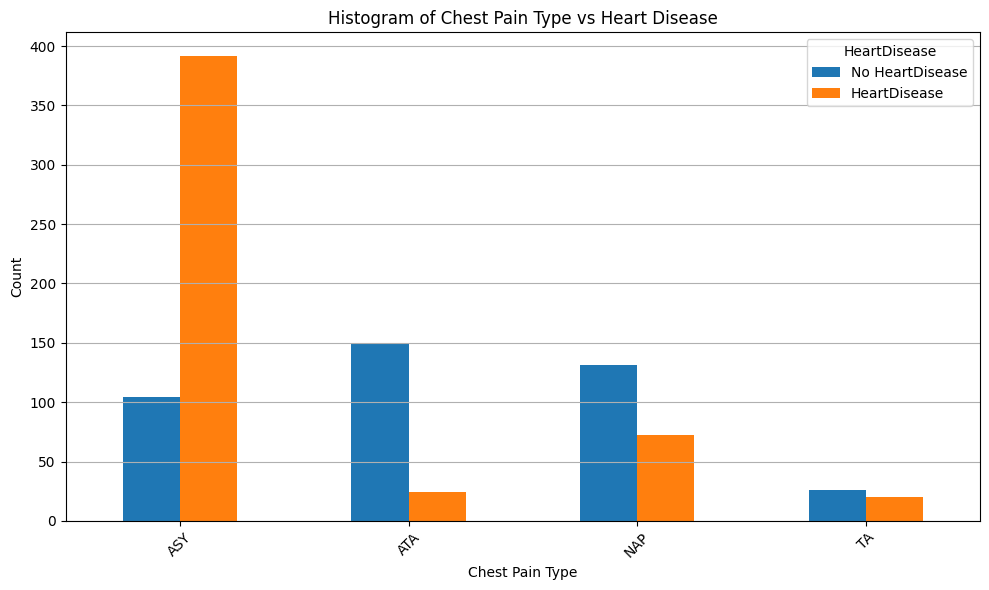

In [ ]:
# Plotting the histogram of ChestPainType Vs. HeartDisease
plt.figure(figsize=(10, 6))

# Grouping by ChestPainType and HeartDisease and counting occurrences
ChestPainType_heartdisease = df.groupby(['ChestPainType', 'HeartDisease']).size().unstack()

# Plotting the histogram
ChestPainType_heartdisease.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'], ax=plt.gca())

plt.title('Histogram of Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='HeartDisease', labels=['No HeartDisease', 'HeartDisease'])
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


Asymptomatic (ASY) individuals are at a particularly high risk of heart disease, as indicated by the overwhelming number of heart disease cases in this category. This suggests that a lack of symptoms should not be taken as an indication of the absence of heart disease.
Non-Anginal Pain (NAP) and Atypical Angina (ATA) are more commonly associated with non-heart disease cases, but heart disease is still present in these groups.
Typical Angina (TA), despite being the classic symptom of heart disease, has fewer cases overall in this dataset, which might suggest a need for more nuanced diagnostic approaches.

###RestingBP

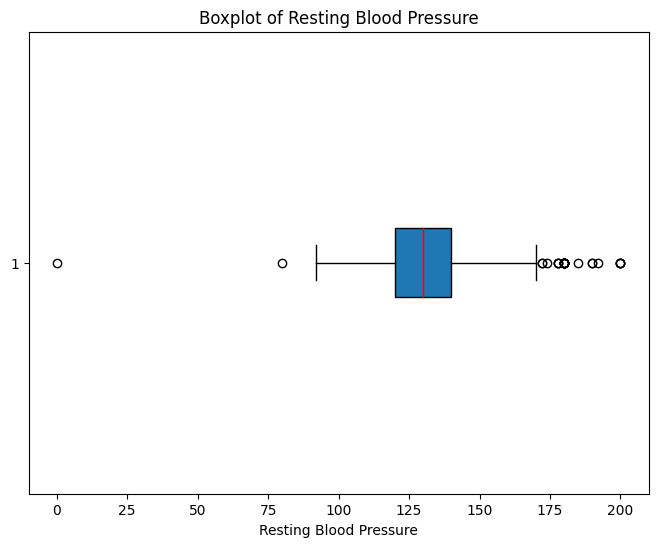

In [ ]:
# Creating a boxplot for the RestingBP values
plt.figure(figsize=(8, 6))
plt.boxplot(df['RestingBP'].dropna(), vert=False, patch_artist=True,
            boxprops=dict(facecolor='#1f77b4', color='black'),
            medianprops=dict(color='red'))

plt.title('Boxplot of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure')
plt.show()

The median resting blood pressure in this dataset is around 130 mmHg, which is within the typical range for adults.

<Figure size 1000x600 with 0 Axes>

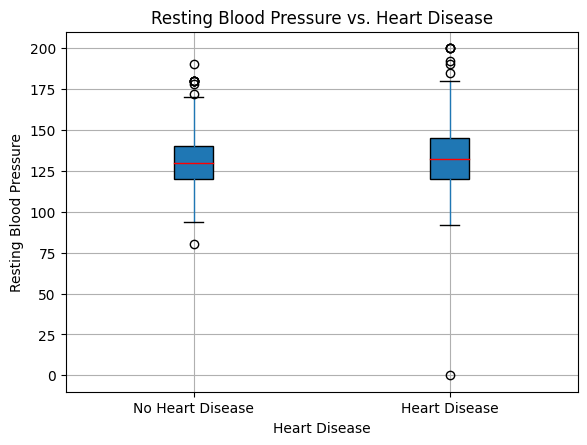

In [ ]:
# Creating a boxplot to visualize RestingBP against HeartDisease
plt.figure(figsize=(10, 6))
df.boxplot(column='RestingBP', by='HeartDisease', patch_artist=True,
           boxprops=dict(facecolor='#1f77b4', color='black'),
           medianprops=dict(color='red'))

plt.title('Resting Blood Pressure vs. Heart Disease')
plt.suptitle('')  # Suppress the default title to only show the custom title
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure')
plt.xticks([1, 2], ['No Heart Disease', 'Heart Disease'])

plt.show()

Both groups, those with heart disease and those without, have a similar median resting blood pressure, which appears to be around 130 mmHg,  suggesting that resting blood pressure alone may not be a strong distinguishing factor between those with and without heart disease.



###Cholesterol

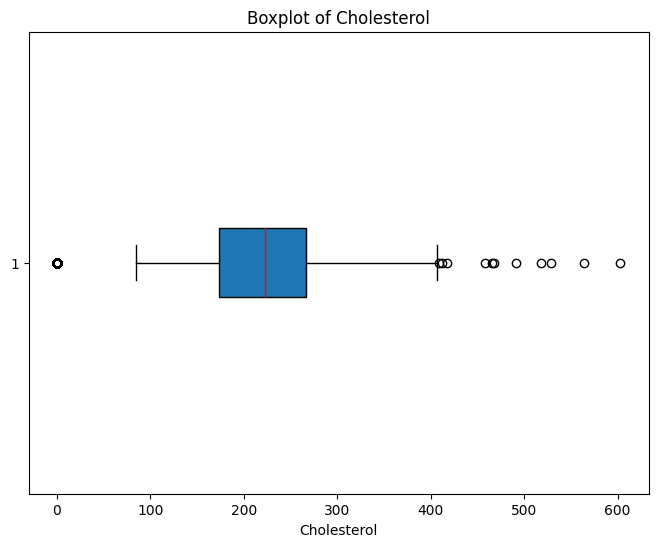

In [ ]:
# Creating a boxplot for the Cholesterol values
plt.figure(figsize=(8, 6))
plt.boxplot(df['Cholesterol'].dropna(), vert=False, patch_artist=True,
            boxprops=dict(facecolor='#1f77b4', color='black'),
            medianprops=dict(color='red'))

plt.title('Boxplot of Cholesterol')
plt.xlabel('Cholesterol')
plt.show()

The median cholesterol level is above 200 mg/dL, which is close to the upper limit of the normal range. This indicates that the typical cholesterol level in this dataset may be slightly elevated.

<Figure size 1000x600 with 0 Axes>

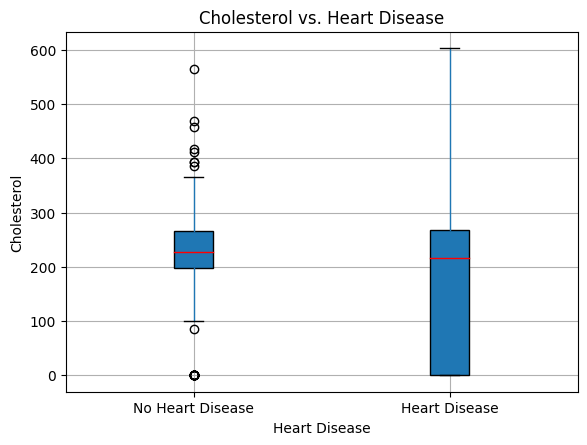

In [ ]:
# Creating a boxplot to visualize Cholesterol against HeartDisease
plt.figure(figsize=(10, 6))
df.boxplot(column='Cholesterol', by='HeartDisease', patch_artist=True,
           boxprops=dict(facecolor='#1f77b4', color='black'),
           medianprops=dict(color='red'))

plt.title('Cholesterol vs. Heart Disease')
plt.suptitle('')  # Suppress the default title to only show the custom title
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.xticks([1, 2], ['No Heart Disease', 'Heart Disease'])

plt.show()

The boxplot suggests that individuals with heart disease tend to have a wider range of cholesterol levels, with a slightly higher median cholesterol level compared to those without heart disease.

The distribution of cholesterol levels among those with heart disease is more variable, indicating that high cholesterol might be more common in this group.

###FastingBS

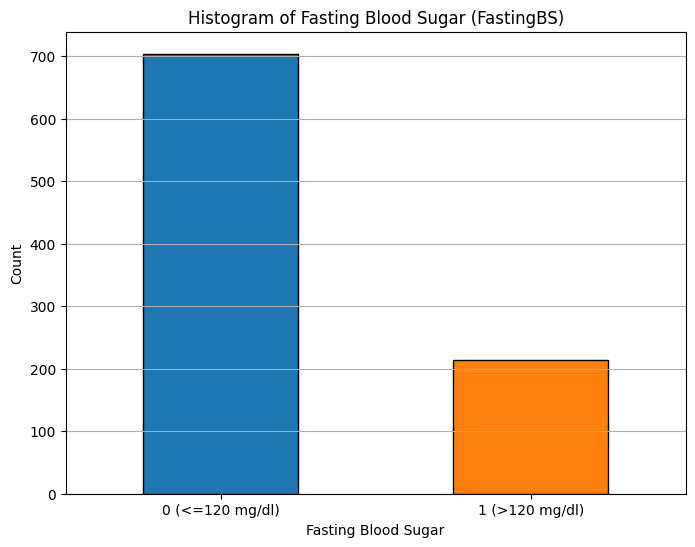

In [ ]:
# Grouping the data by FastingBS and counting occurrences
fastingbs_counts = df['FastingBS'].value_counts().sort_index()

# Plotting the histogram with different colors
plt.figure(figsize=(8, 6))
fastingbs_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], edgecolor='black')

plt.title('Histogram of Fasting Blood Sugar (FastingBS)')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.xticks([0, 1], ['0 (<=120 mg/dl)', '1 (>120 mg/dl)'], rotation=0)
plt.grid(axis='y')

plt.show()

The histogram suggests that fasting blood sugar levels ≤ 120 mg/dl are more common in this population, with a much smaller number of individuals having fasting blood sugar levels exceeding 120 mg/dl.

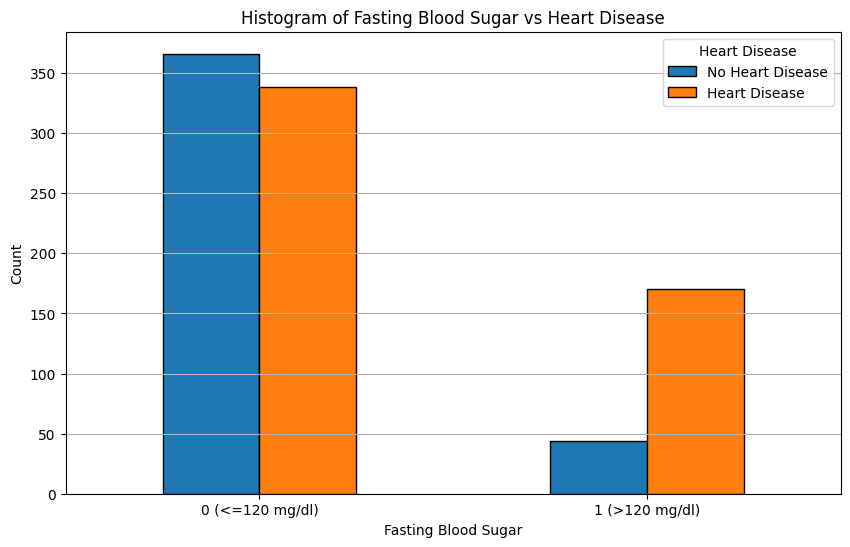

In [ ]:
# Grouping by FastingBS and HeartDisease and counting occurrences
fastingbs_heartdisease = df.groupby(['FastingBS', 'HeartDisease']).size().unstack(fill_value=0)

# Plotting the histogram with different colors
plt.figure(figsize=(10, 6))
fastingbs_heartdisease.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'], edgecolor='black', ax=plt.gca())

plt.title('Histogram of Fasting Blood Sugar vs Heart Disease')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.xticks([0, 1], ['0 (<=120 mg/dl)', '1 (>120 mg/dl)'], rotation=0)
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
plt.grid(axis='y')

plt.show()

The histogram suggests a potential relationship between elevated fasting blood sugar levels and the presence of heart disease. Individuals with higher fasting blood sugar levels (> 120 mg/dl) appear to have a greater likelihood of having heart disease, whereas those with lower fasting blood sugar levels (≤ 120 mg/dl) are more evenly distributed between the two groups.

###RestingECG

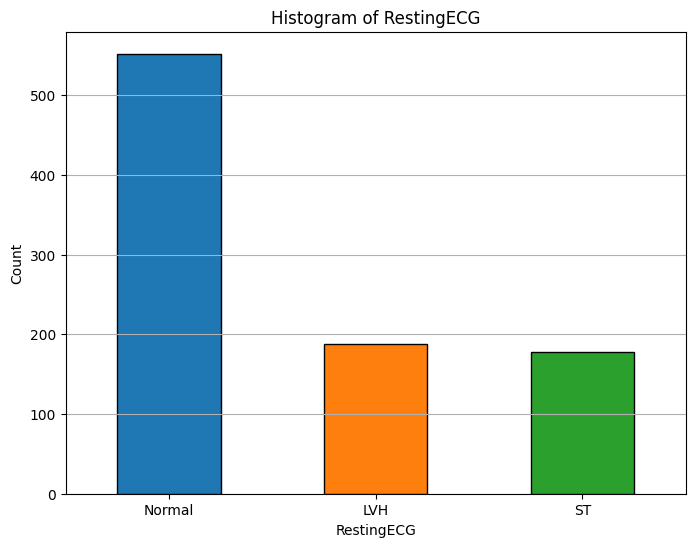

In [ ]:
# Plotting the histogram for RestingECG
plt.figure(figsize=(8, 6))
df['RestingECG'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'], edgecolor='black')

plt.title('Histogram of RestingECG')
plt.xlabel('RestingECG')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

The histogram indicates that a normal Resting ECG is the most prevalent result among the individuals in this dataset. In contrast, LVH and ST-T wave abnormalities are less common and occur at similar frequencies.

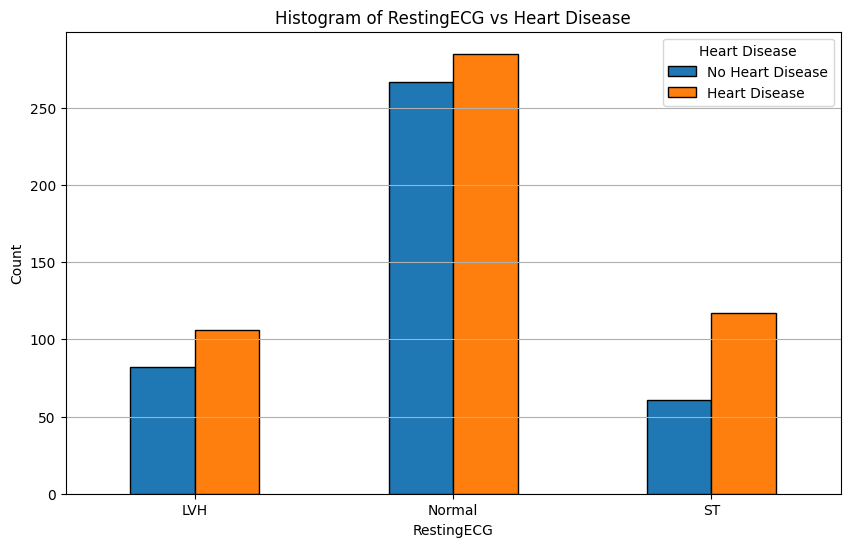

In [ ]:
# Grouping by RestingECG and HeartDisease and counting occurrences
restingecg_heartdisease = df.groupby(['RestingECG', 'HeartDisease']).size().unstack(fill_value=0)

# Plotting the histogram with different colors
plt.figure(figsize=(10, 6))
restingecg_heartdisease.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'], edgecolor='black', ax=plt.gca())

plt.title('Histogram of RestingECG vs Heart Disease')
plt.xlabel('RestingECG')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

The histogram illustrates that certain Resting ECG results, such as LVH and ST-T wave abnormalities, are more commonly associated with heart disease. While a normal ECG is the most common result, it is relatively evenly distributed between individuals with and without heart disease, indicating that further examination beyond the ECG may be necessary to assess heart disease risk.

###MaxHR

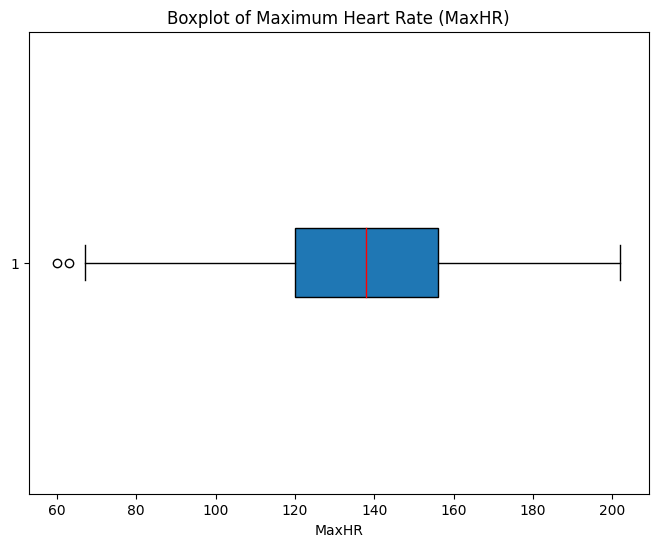

In [ ]:
# Creating a boxplot for the MaxHR values
plt.figure(figsize=(8, 6))
plt.boxplot(df['MaxHR'].dropna(), vert=False, patch_artist=True,
            boxprops=dict(facecolor='#1f77b4', color='black'),
            medianprops=dict(color='red'))

plt.title('Boxplot of Maximum Heart Rate (MaxHR)')
plt.xlabel('MaxHR')
plt.show()

The majority of individuals have a MaxHR between 120 bpm and 160 bpm, with a median around 140 bpm.

<Figure size 1000x600 with 0 Axes>

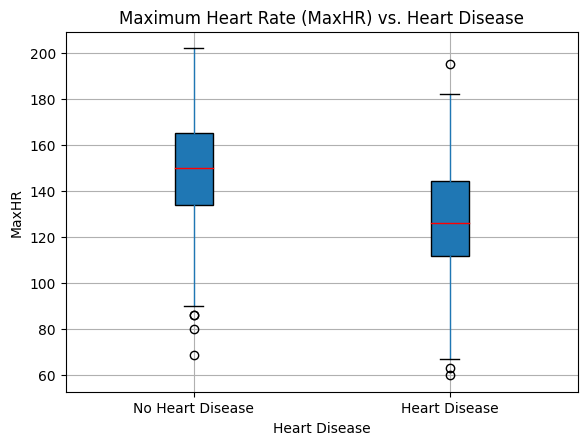

In [ ]:
# Creating a boxplot to visualize MaxHR against HeartDisease
plt.figure(figsize=(10, 6))
df.boxplot(column='MaxHR', by='HeartDisease', patch_artist=True,
           boxprops=dict(facecolor='#1f77b4', color='black'),
           medianprops=dict(color='red'))

plt.title('Maximum Heart Rate (MaxHR) vs. Heart Disease')
plt.suptitle('')  # Suppress the default title to only show the custom title
plt.xlabel('Heart Disease')
plt.ylabel('MaxHR')
plt.xticks([1, 2], ['No Heart Disease', 'Heart Disease'])

plt.show()

The boxplot suggests that maximum heart rate is generally higher in individuals without heart disease and lower in those with heart disease. The lower MaxHR in individuals with heart disease could indicate reduced cardiovascular efficiency, which might be a result of or contribute to heart disease.

<Figure size 1000x600 with 0 Axes>

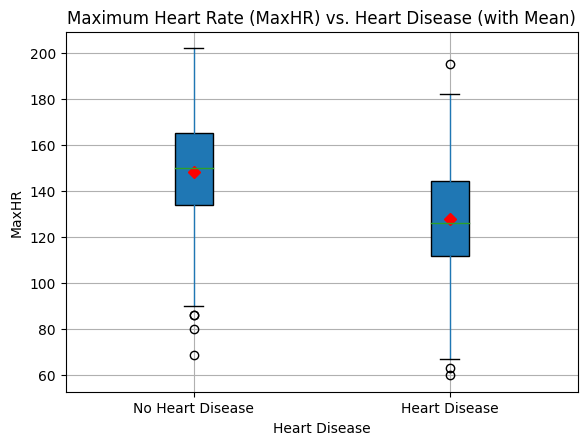

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Creating the boxplot for MaxHR against HeartDisease
plt.figure(figsize=(10, 6))
boxplot = df.boxplot(column='MaxHR', by='HeartDisease', patch_artist=True,
                     boxprops=dict(facecolor='#1f77b4', color='black'))

# Calculating the means
means = df.groupby('HeartDisease')['MaxHR'].mean()

# Overlaying the mean on the boxplot
for i, mean in enumerate(means, start=1):
    plt.plot(i, mean, 'rD')  # 'rD' means a red diamond marker for the mean

plt.title('Maximum Heart Rate (MaxHR) vs. Heart Disease (with Mean)')
plt.suptitle('')  # Suppress the default title to only show the custom title
plt.xlabel('Heart Disease')
plt.ylabel('MaxHR')
plt.xticks([1, 2], ['No Heart Disease', 'Heart Disease'])

plt.show()

In [ ]:
import pandas as pd

# Calculating the mean of MaxHR for each group (HeartDisease = 0 and 1)
means = df.groupby('HeartDisease')['MaxHR'].mean()

# Creating a table to show the mean calculation
means_table = pd.DataFrame(means).reset_index()
means_table.columns = ['HeartDisease', 'Mean MaxHR']

# Displaying the table
print(means_table)

   HeartDisease  Mean MaxHR
0             0  148.151220
1             1  127.655512


###ExerciseAngina

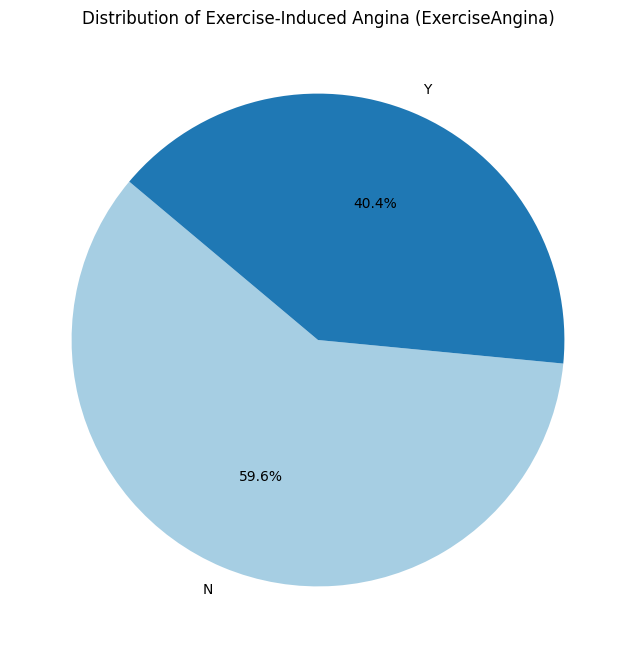

In [ ]:
# Counting the occurrences of each category in ExerciseAngina
exercise_angina_counts = df['ExerciseAngina'].value_counts()

# Plotting the pie chart for ExerciseAngina
plt.figure(figsize=(8, 8))
plt.pie(exercise_angina_counts, labels=exercise_angina_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Exercise-Induced Angina (ExerciseAngina)')
plt.show()

The larger portion of the pie chart represents individuals who do not suffer from exercise-induced angina, making up nearly 60% of the population.About 40% of the individuals do experience angina induced by exercise, which is a considerable proportion, highlighting the relevance of this condition in the population.

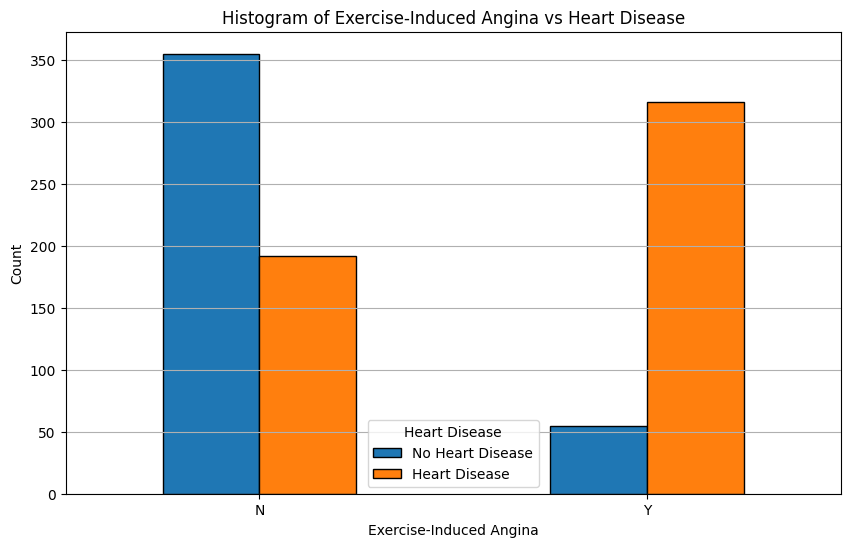

In [ ]:
# Grouping by ExerciseAngina and HeartDisease and counting occurrences
exercise_angina_heartdisease = df.groupby(['ExerciseAngina', 'HeartDisease']).size().unstack(fill_value=0)

# Plotting the histogram with different colors
plt.figure(figsize=(10, 6))
exercise_angina_heartdisease.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'], edgecolor='black', ax=plt.gca())

plt.title('Histogram of Exercise-Induced Angina vs Heart Disease')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

The histogram clearly indicates a strong association between exercise-induced angina and heart disease. Individuals who report exercise-induced angina are much more likely to have heart disease compared to those who do not experience this symptom. This suggests that exercise-induced angina could be an important indicator of heart disease in the population studied.








###Oldpeak

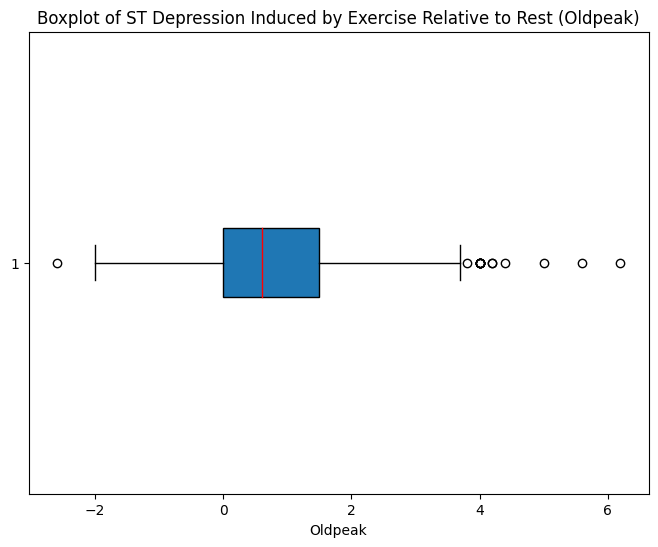

In [ ]:
# Creating a boxplot for the Oldpeak values
plt.figure(figsize=(8, 6))
plt.boxplot(df['Oldpeak'].dropna(), vert=False, patch_artist=True,
            boxprops=dict(facecolor='#1f77b4', color='black'),
            medianprops=dict(color='red'))

plt.title('Boxplot of ST Depression Induced by Exercise Relative to Rest (Oldpeak)')
plt.xlabel('Oldpeak')
plt.show()

<Figure size 1000x600 with 0 Axes>

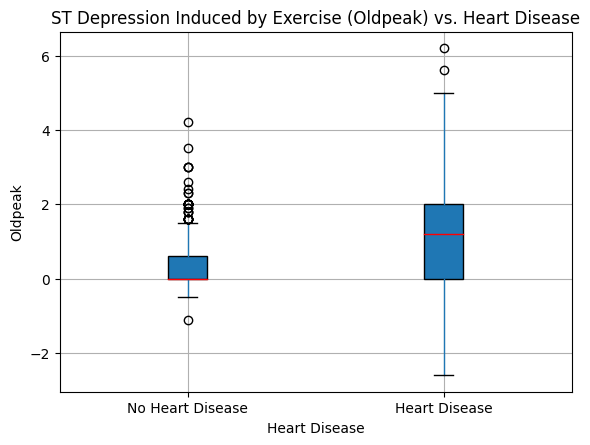

In [ ]:
# Creating a boxplot to visualize Oldpeak against HeartDisease
plt.figure(figsize=(10, 6))
df.boxplot(column='Oldpeak', by='HeartDisease', patch_artist=True,
           boxprops=dict(facecolor='#1f77b4', color='black'),
           medianprops=dict(color='red'))

plt.title('ST Depression Induced by Exercise (Oldpeak) vs. Heart Disease')
plt.suptitle('')  # Suppress the default title to only show the custom title
plt.xlabel('Heart Disease')
plt.ylabel('Oldpeak')
plt.xticks([1, 2], ['No Heart Disease', 'Heart Disease'])

plt.show()

The boxplot shows a clear distinction in Oldpeak values between individuals with and without heart disease. Higher and more variable ST depression values are associated with heart disease, indicating that Oldpeak could be a useful indicator for assessing the presence of heart disease. The lower and more consistent Oldpeak values in the "No Heart Disease" group suggest that minimal ST depression is typical in healthier individuals.

<Figure size 1000x600 with 0 Axes>

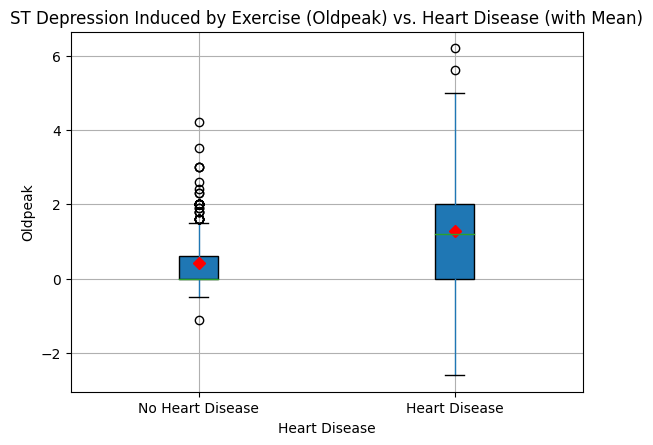

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Creating the boxplot for Oldpeak against HeartDisease
plt.figure(figsize=(10, 6))
boxplot = df.boxplot(column='Oldpeak', by='HeartDisease', patch_artist=True,
                     boxprops=dict(facecolor='#1f77b4', color='black'))

# Calculating the means
means = df.groupby('HeartDisease')['Oldpeak'].mean()

# Overlaying the mean on the boxplot
for i, mean in enumerate(means, start=1):
    plt.plot(i, mean, 'rD')  # 'rD' means a red diamond marker for the mean

plt.title('ST Depression Induced by Exercise (Oldpeak) vs. Heart Disease (with Mean)')
plt.suptitle('')  # Suppress the default title to only show the custom title
plt.xlabel('Heart Disease')
plt.ylabel('Oldpeak')
plt.xticks([1, 2], ['No Heart Disease', 'Heart Disease'])

plt.show()

In [ ]:
import pandas as pd

# Calculating the mean of Oldpeak for each group (HeartDisease = 0 and 1)
means_oldpeak = df.groupby('HeartDisease')['Oldpeak'].mean()

# Creating a table to show the mean calculation
means_oldpeak_table = pd.DataFrame(means_oldpeak).reset_index()
means_oldpeak_table.columns = ['HeartDisease', 'Mean Oldpeak']

# Displaying the table
print(means_oldpeak_table)

   HeartDisease  Mean Oldpeak
0             0      0.408049
1             1      1.274213


###ST_Slope

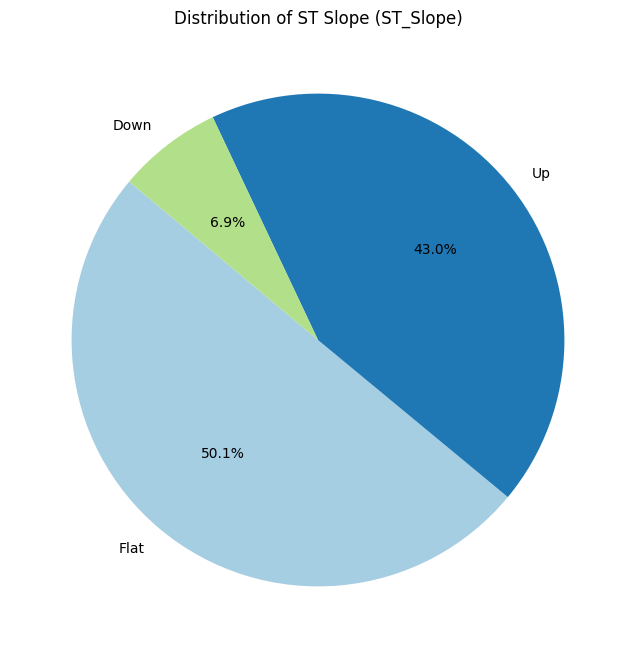

In [ ]:
# Counting the occurrences of each category in ST_Slope
st_slope_counts = df['ST_Slope'].value_counts()

# Plotting the pie chart for ST_Slope
plt.figure(figsize=(8, 8))
plt.pie(st_slope_counts, labels=st_slope_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of ST Slope (ST_Slope)')
plt.show()

The pie chart highlights that a flat ST slope is the most prevalent among individuals in the dataset, followed closely by an upward slope. A downward slope is relatively rare. These distributions could provide insights into the overall cardiac health of the population being studied, with particular attention needed for those with a downward slope due to its potential association with adverse cardiac conditions.

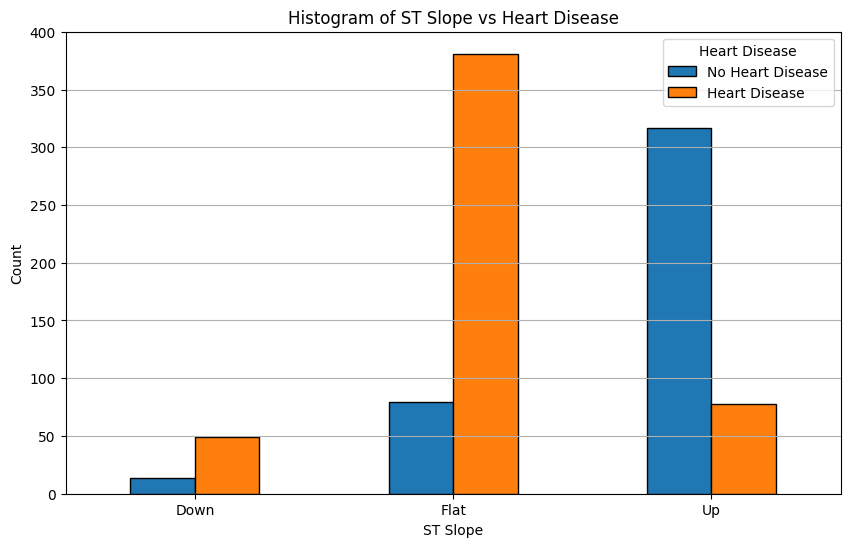

In [ ]:
# Grouping by ST_Slope and HeartDisease and counting occurrences
st_slope_heartdisease = df.groupby(['ST_Slope', 'HeartDisease']).size().unstack(fill_value=0)

# Plotting the histogram with different colors
plt.figure(figsize=(10, 6))
st_slope_heartdisease.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'], edgecolor='black', ax=plt.gca())

plt.title('Histogram of ST Slope vs Heart Disease')
plt.xlabel('ST Slope')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

The histogram shows a clear relationship between ST slope types and the presence of heart disease. Downward and flat ST slopes are more common among individuals with heart disease, while an upward ST slope is more frequently seen in those without heart disease. This suggests that the ST slope could be a useful indicator in assessing the risk of heart disease, with downward and flat slopes indicating higher risk and upward slopes indicating lower risk.

##5.Predictive Modeling

###Model Training

In [ ]:
# One-Hot Encoding for categorical columns
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

# Display the first few rows of the encoded dataframe
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [ ]:
df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [ ]:
df.dtypes

,0
Age,int64
RestingBP,int64
Cholesterol,int64
FastingBS,int64
MaxHR,int64
Oldpeak,float64
HeartDisease,int64
Sex_F,bool
Sex_M,bool
ChestPainType_ASY,bool


In [ ]:
# Convert the specified boolean columns back to binary (0 and 1)
boolean_columns = [
    'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
    'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
    'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
    'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'
]

# Convert boolean to binary
for col in boolean_columns:
    df[col] = df[col].astype(int)

In [ ]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [ ]:
# Splitting the data into training and testing sets
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# List of models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss'),
    "LightGBM": lgb.LGBMClassifier(),
    "CatBoost": cb.CatBoostClassifier(verbose=0),
    "LogitBoost": LogitBoost()
}


In [ ]:
from sklearn.metrics import confusion_matrix
# Function to train and evaluate models
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    predictions = {}
    feature_importances = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }
        predictions[name] = y_pred

        print(f"{name} results:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}\n")

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Feature importance
        if hasattr(model, 'feature_importances_'):
            feature_importance = pd.DataFrame({'Features': X_train.columns, 'Importance': model.feature_importances_})
            feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
            feature_importance.reset_index(drop=True, inplace=True)
            feature_importances[name] = feature_importance

            plt.figure(figsize=(10, 8))
            sns.barplot(x='Importance', y='Features', data=feature_importance)
            plt.title(f'Feature Importance for {name}')
            plt.show()

    return results, predictions, feature_importances


###Model Evaluation

Logistic Regression results:
Accuracy: 0.8533
Precision: 0.8488
Recall: 0.8556
F1 Score: 0.8509



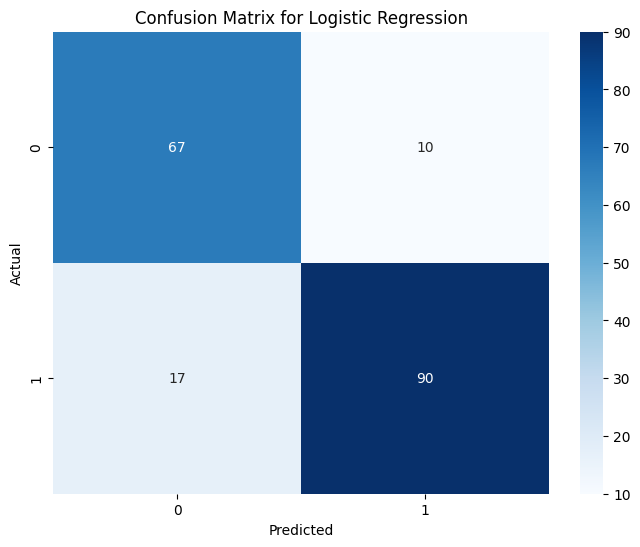

Decision Tree results:
Accuracy: 0.7880
Precision: 0.7850
Recall: 0.7923
F1 Score: 0.7858



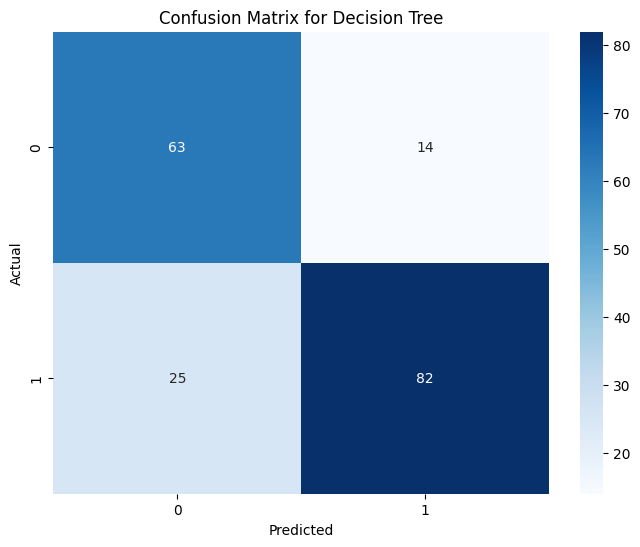

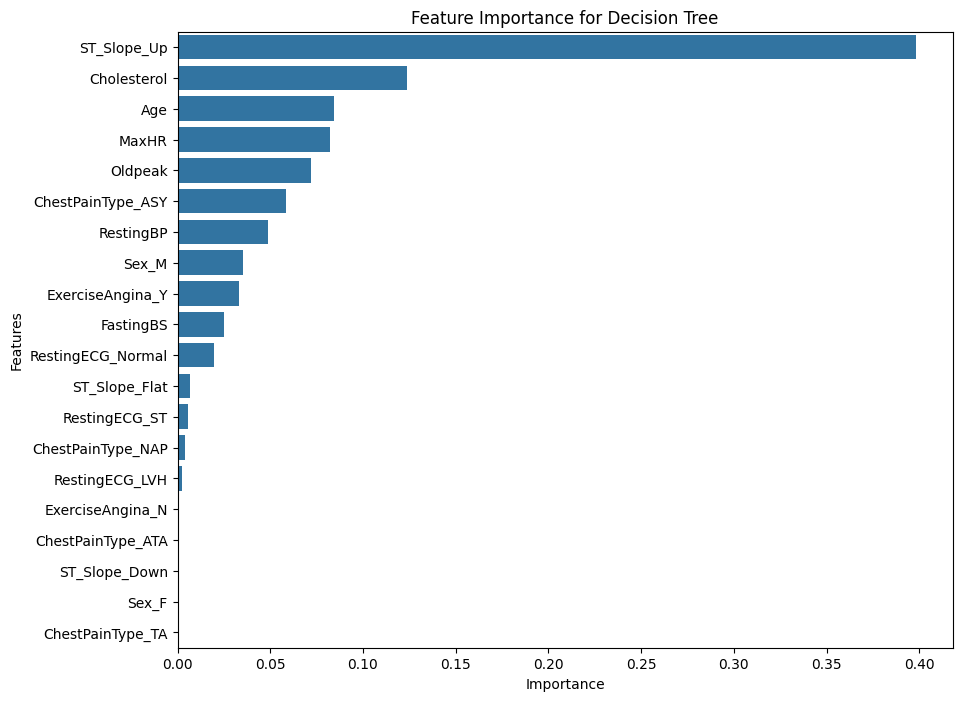

Random Forest results:
Accuracy: 0.8641
Precision: 0.8601
Recall: 0.8613
F1 Score: 0.8607



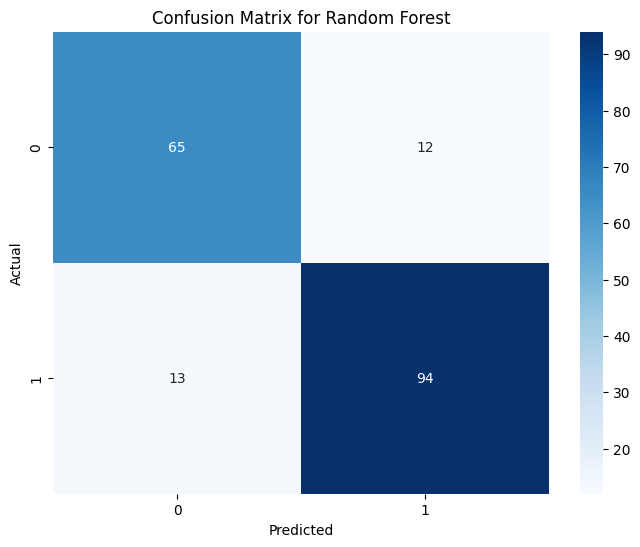

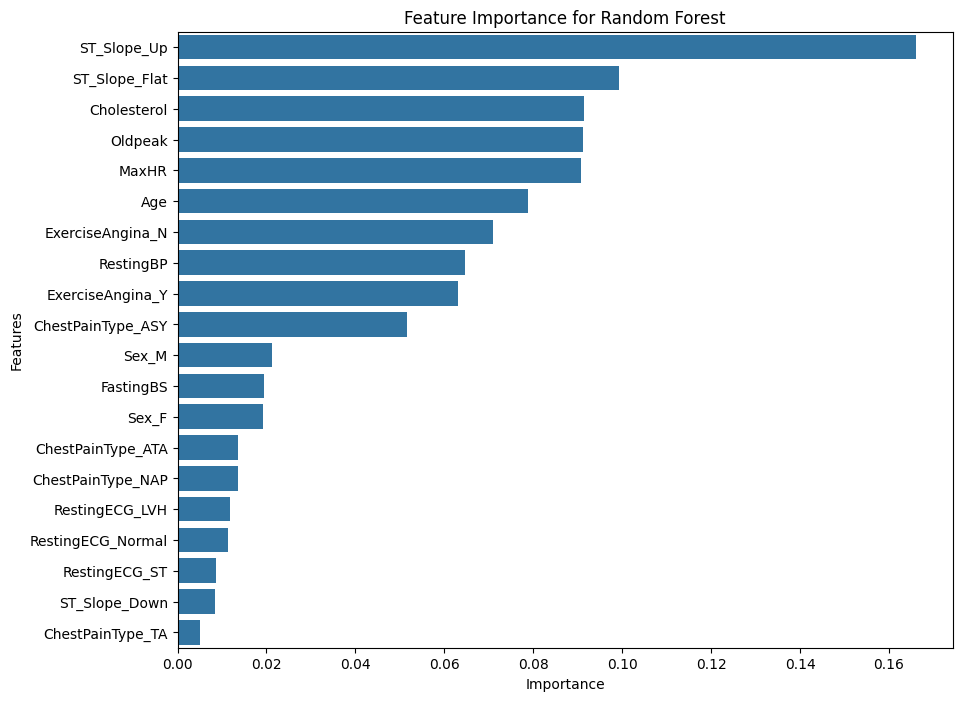

AdaBoost results:
Accuracy: 0.8533
Precision: 0.8494
Recall: 0.8574
F1 Score: 0.8513



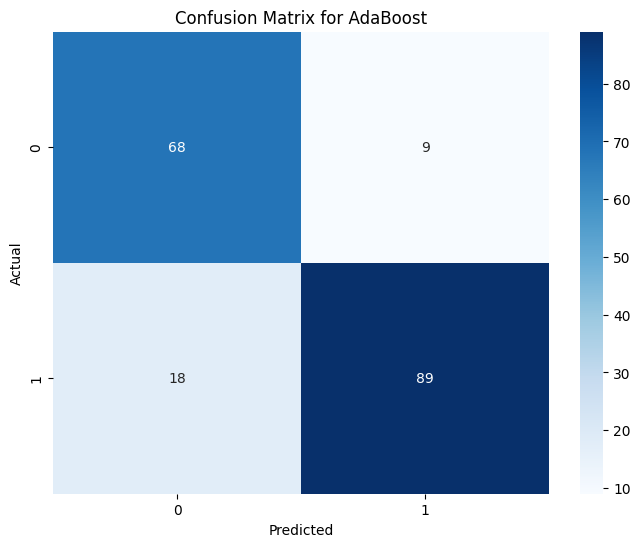

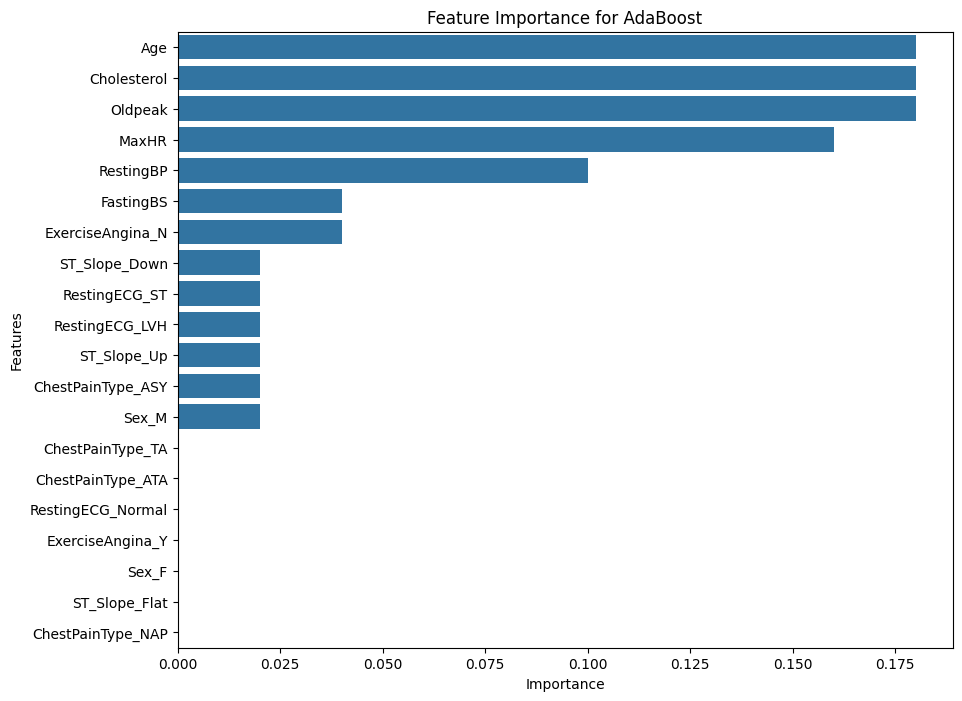

Gradient Boosting results:
Accuracy: 0.8750
Precision: 0.8705
Recall: 0.8761
F1 Score: 0.8726



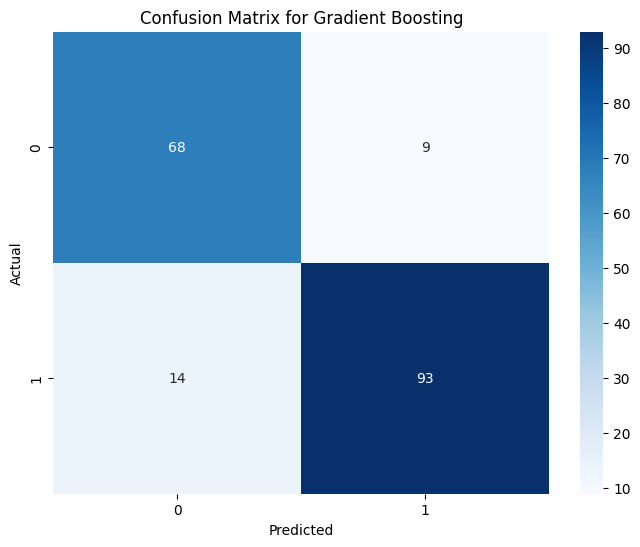

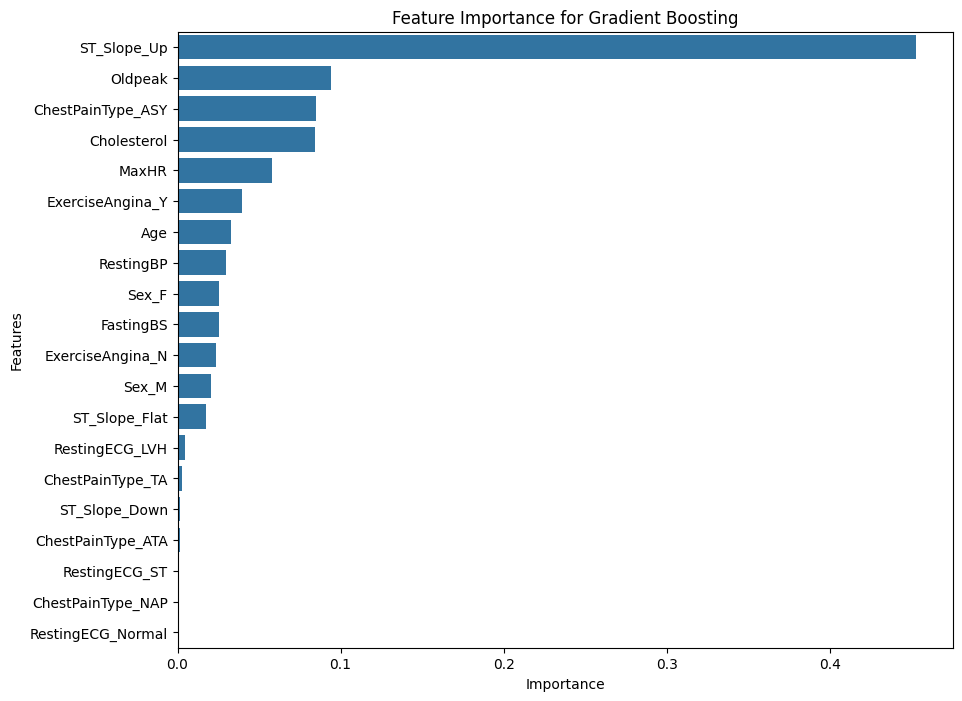

XGBoost results:
Accuracy: 0.8750
Precision: 0.8707
Recall: 0.8743
F1 Score: 0.8722



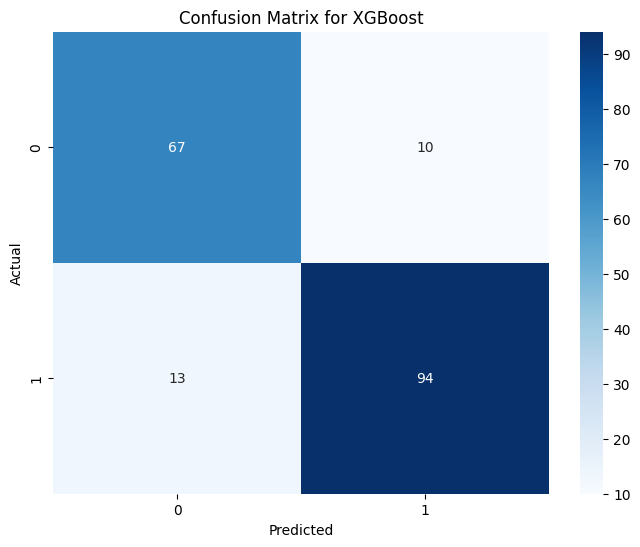

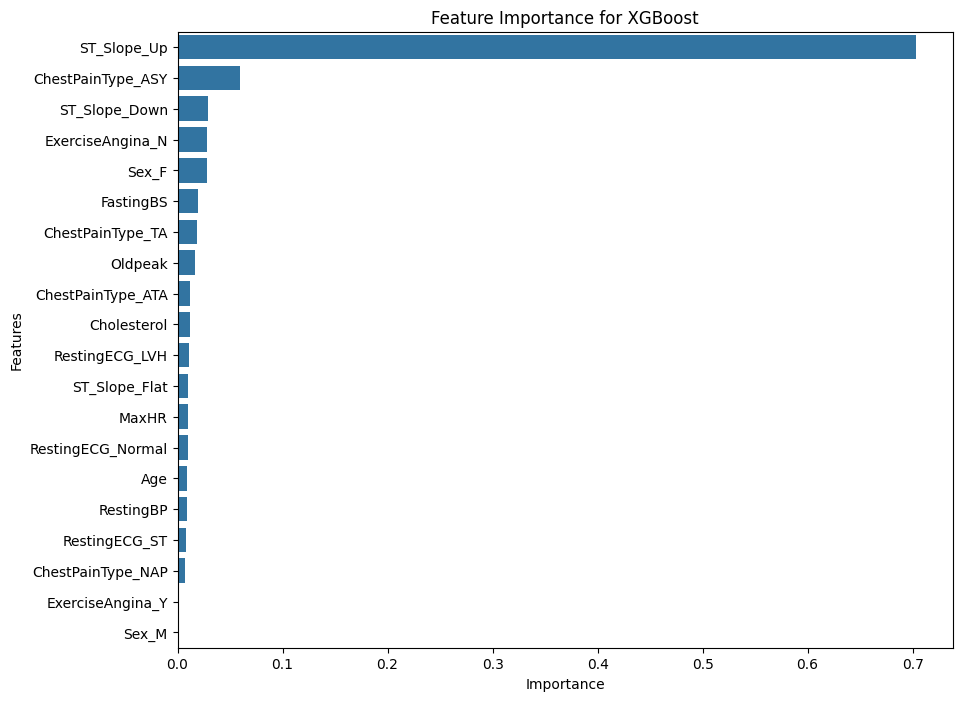

[LightGBM] [Info] Number of positive: 401, number of negative: 333
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546322 -> initscore=0.185819
[LightGBM] [Info] Start training from score 0.185819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

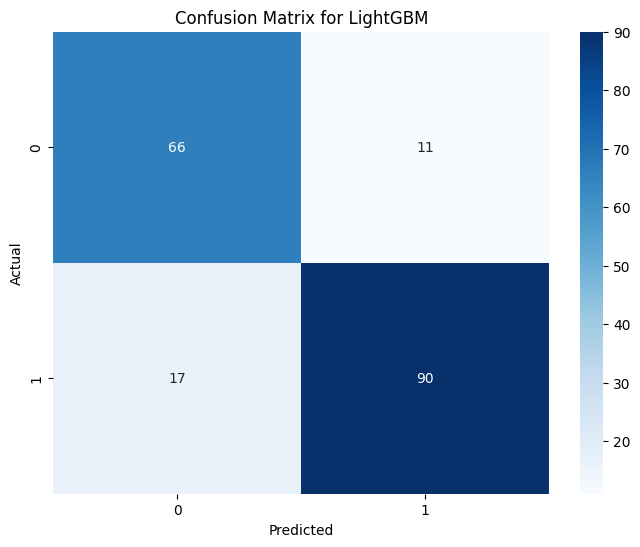

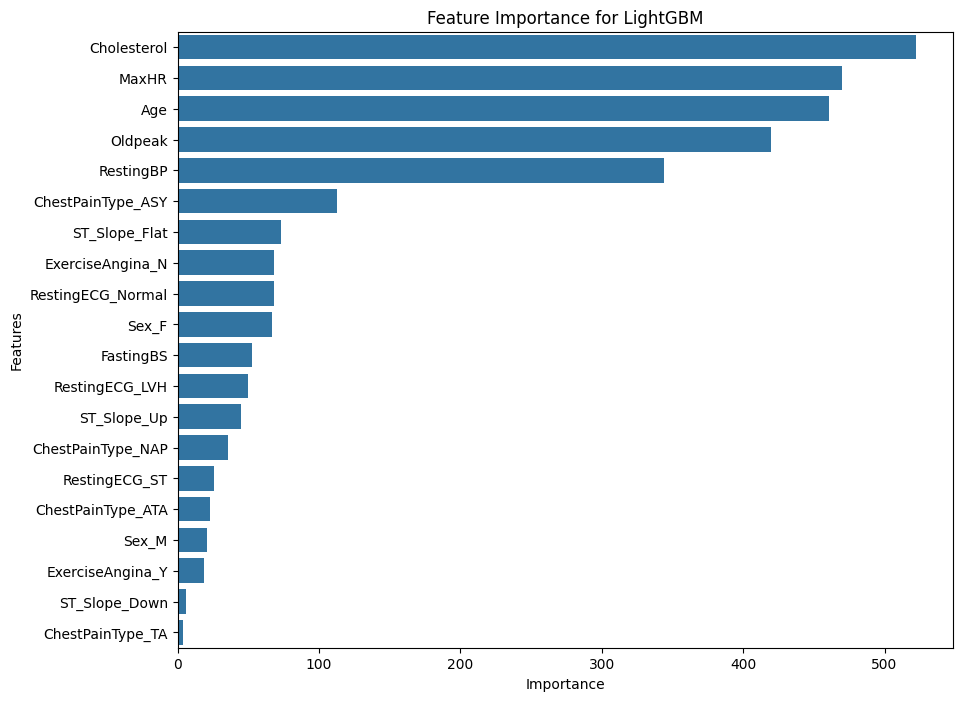

CatBoost results:
Accuracy: 0.8967
Precision: 0.8934
Recall: 0.8948
F1 Score: 0.8941



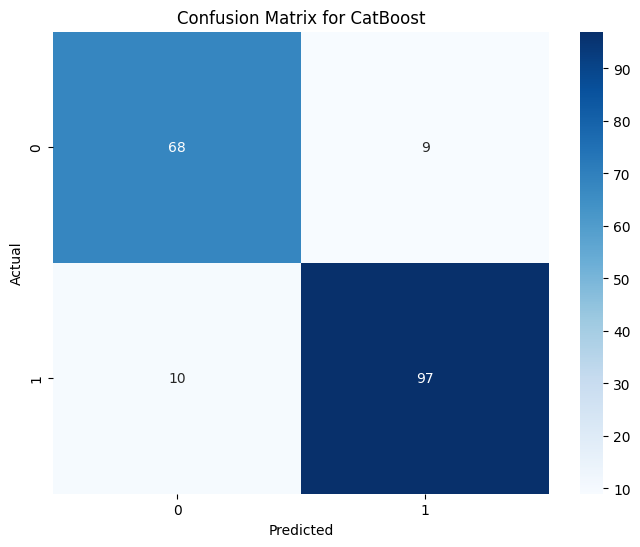

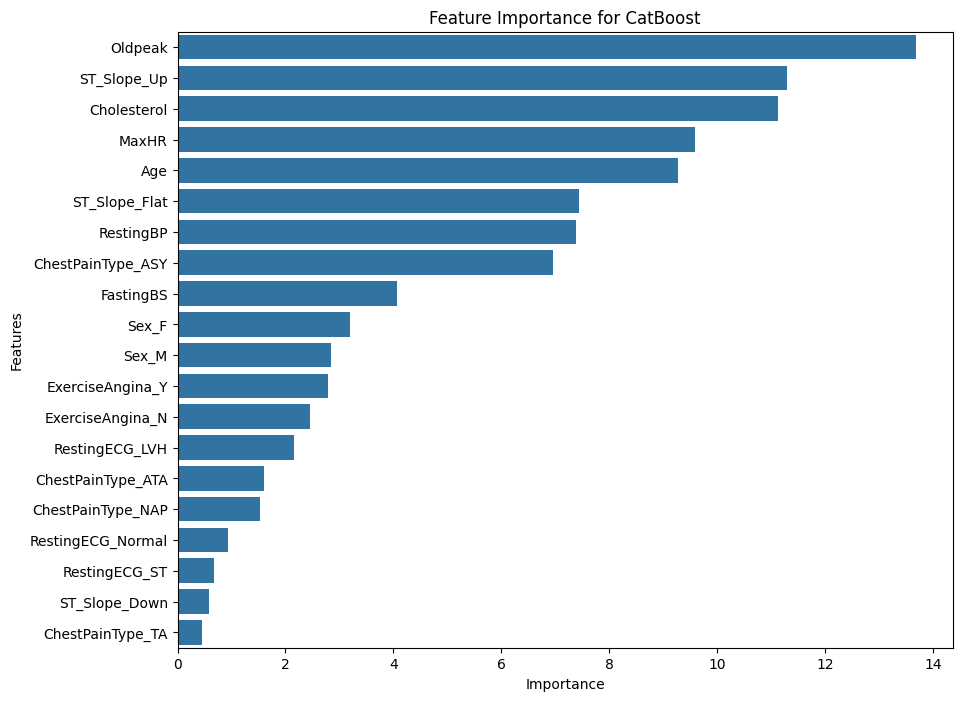

LogitBoost results:
Accuracy: 0.8533
Precision: 0.8494
Recall: 0.8574
F1 Score: 0.8513



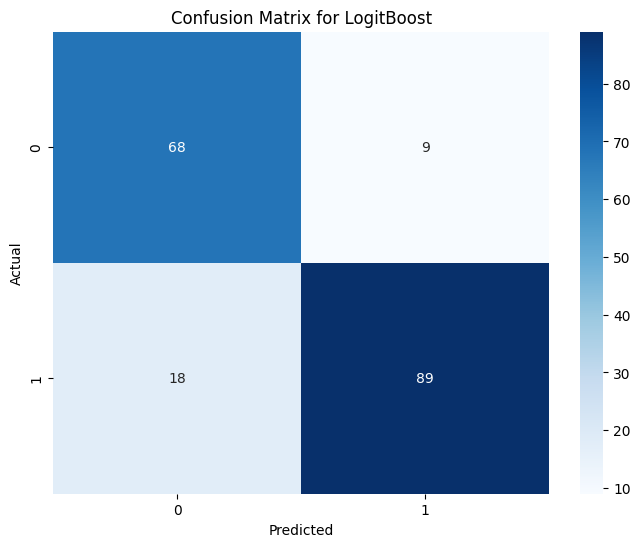

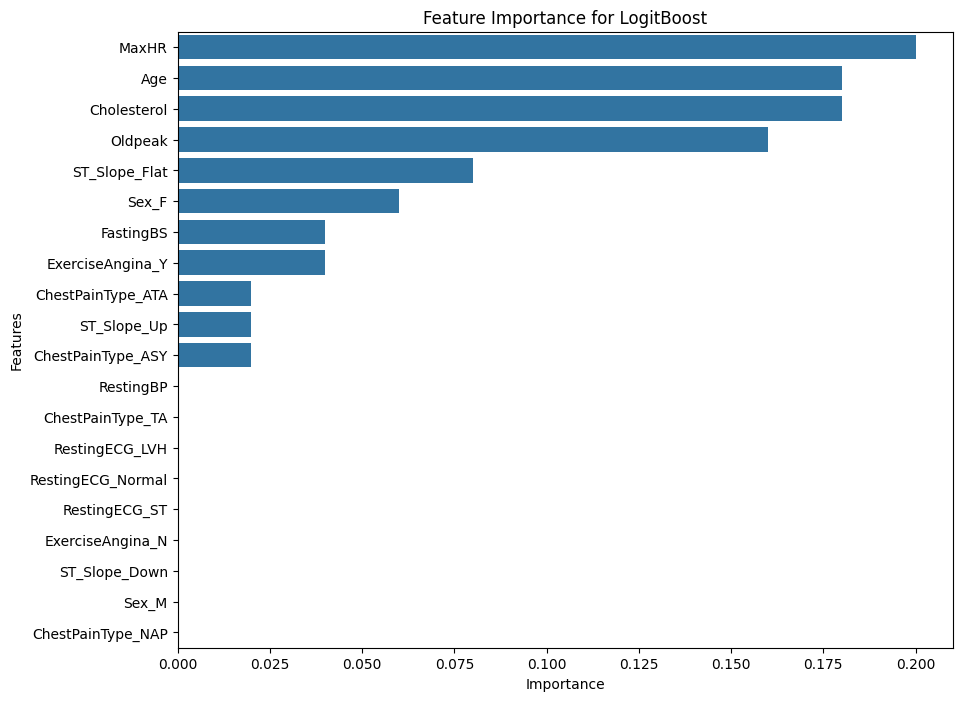

In [ ]:
# Train and evaluate the models
results, predictions, feature_importances = train_and_evaluate(models, X_train, X_test, y_train, y_test)

In [ ]:
# Display results in a table format
results_df = pd.DataFrame(results)
results_df

,Logistic Regression,Decision Tree,Random Forest,AdaBoost,Gradient Boosting,XGBoost,LightGBM,CatBoost,LogitBoost
accuracy,0.853261,0.788043,0.864130,0.853261,0.875000,0.875000,0.847826,0.896739,0.853261
precision,0.848810,0.785038,0.860063,0.849430,0.870516,0.870673,0.843135,0.893445,0.849430
recall,0.855626,0.792268,0.861330,0.857446,0.876138,0.874317,0.849132,0.894829,0.857446
f1_score,0.850932,0.785759,0.860669,0.851324,0.872649,0.872249,0.845192,0.894109,0.851324


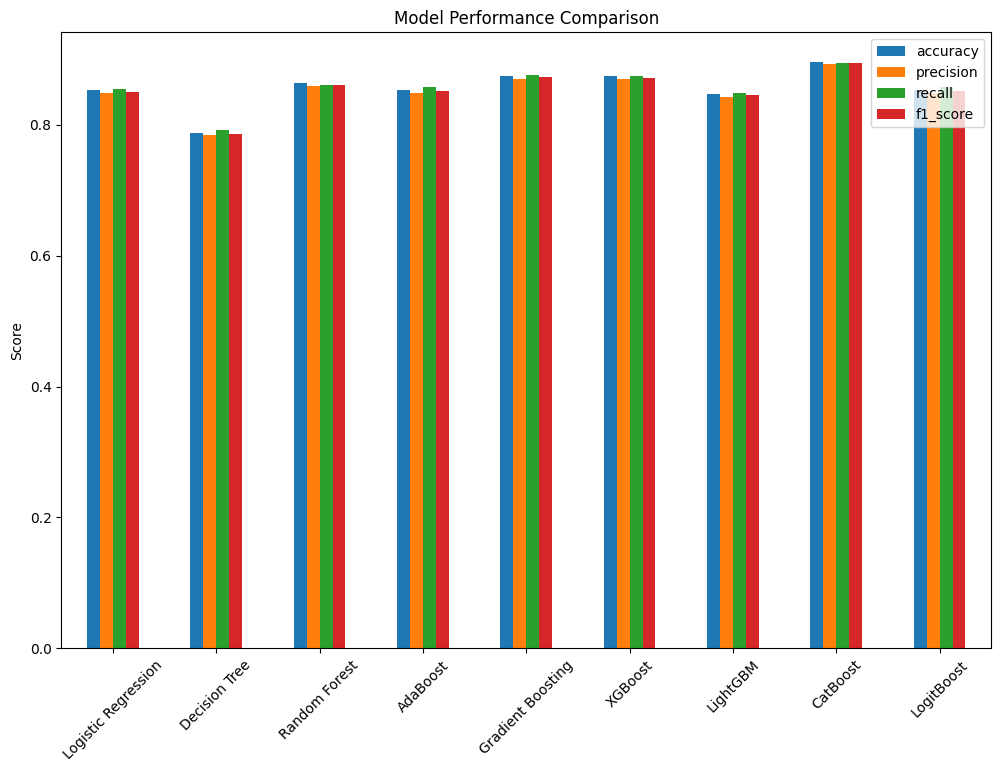

In [ ]:
# Plotting the results
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

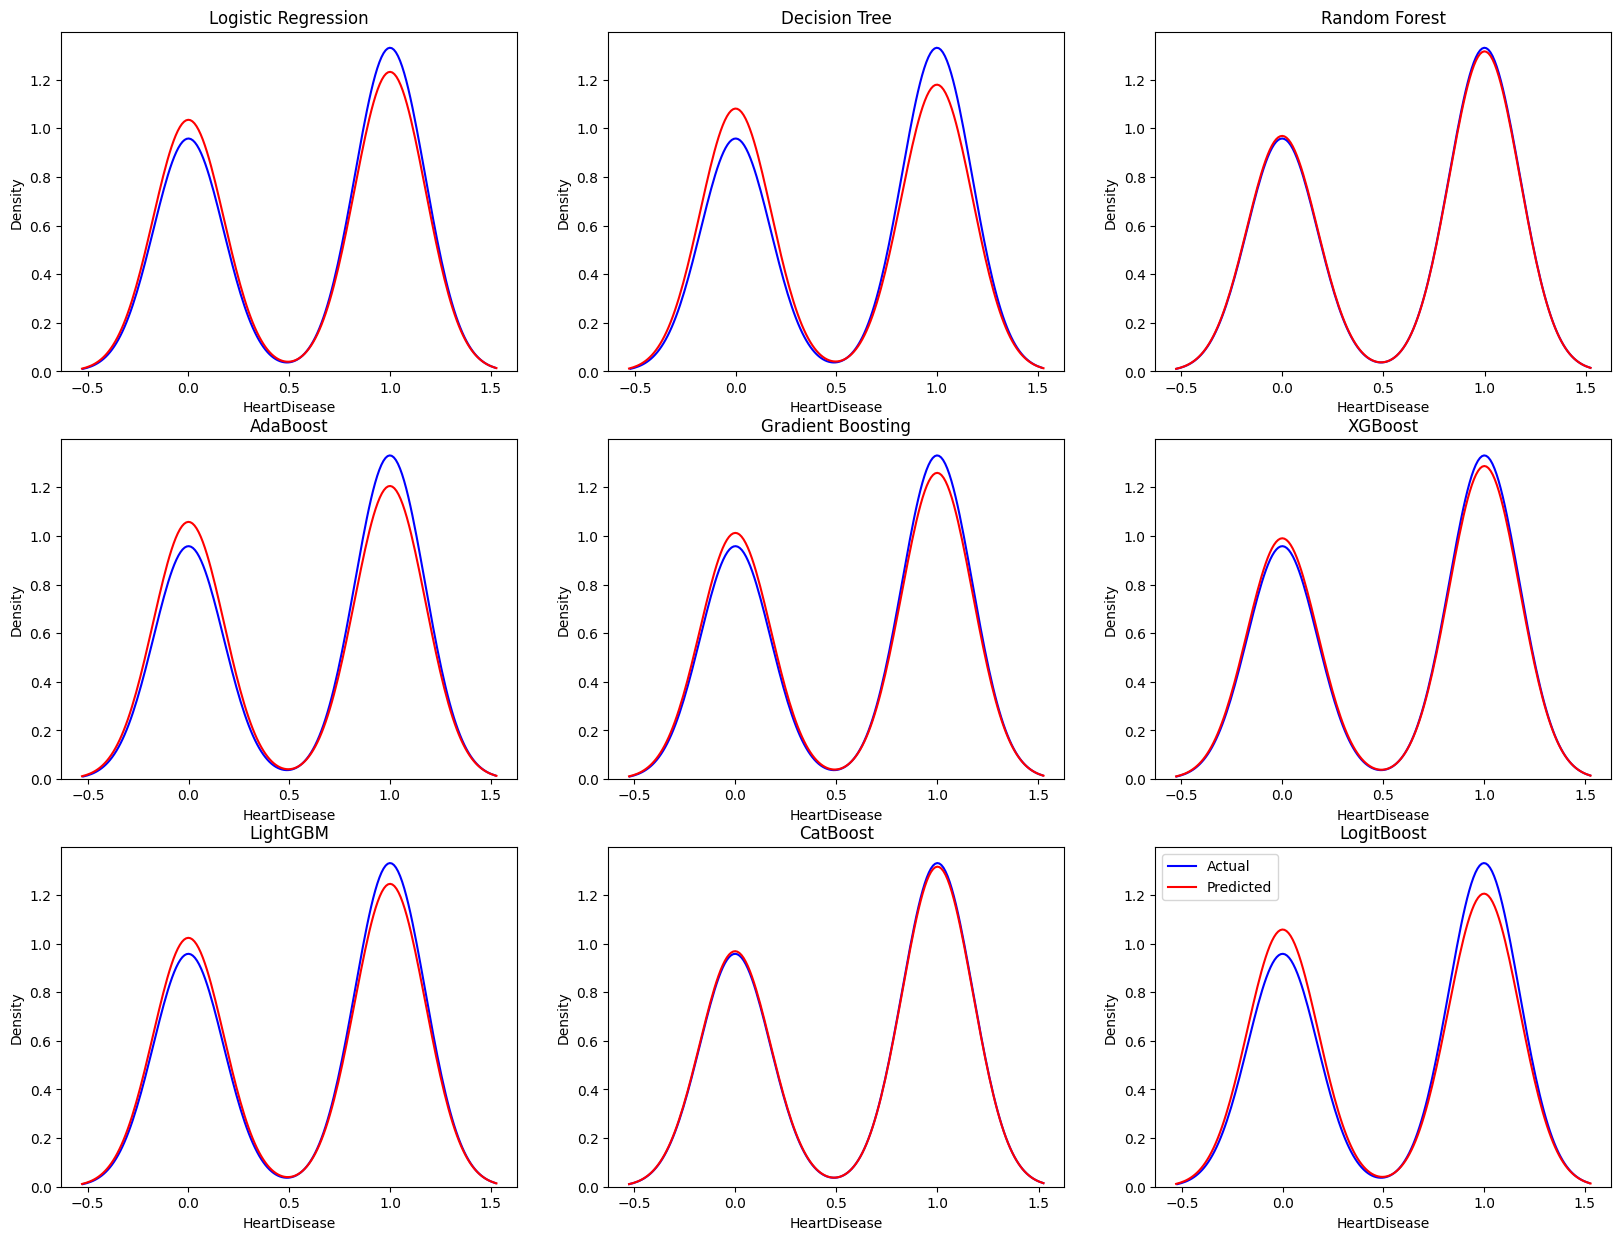

In [ ]:
# Plotting the distributions
fig, ax = plt.subplots(3, 3, figsize=(20, 15))

model_names = list(models.keys())

for i, name in enumerate(model_names):
    sns.kdeplot(y_test, ax=ax[i//3, i%3], label='Actual', color='blue')
    sns.kdeplot(predictions[name], ax=ax[i//3, i%3], label='Predicted', color='red')
    ax[i//3, i%3].set_title(name)

plt.legend()
plt.show()

##6.Conclusion

The data strongly suggests that several factors are significantly associated with the prevalence of heart disease, each providing unique insights into the risk profiles of individuals.

- **Age** emerges as a critical factor, with a marked increase in heart disease cases beginning from the mid-50s onward. This indicates that preventive measures and closer monitoring should be emphasized for individuals as they approach their 50s, particularly because younger individuals (under 40) appear to be less affected by heart disease.

- **Sex** is another important factor, with the data showing a higher prevalence of heart disease among males compared to females. This implies that males might be at greater risk, warranting targeted interventions and awareness campaigns to address this discrepancy.

- Among the types of chest pain, **Asymptomatic (ASY)** individuals show a particularly high risk of heart disease, suggesting that the absence of symptoms should not be mistaken for the absence of disease. Although **Typical Angina (TA)** is classically associated with heart disease, this dataset reveals fewer cases, indicating a potential need for more nuanced diagnostic criteria that go beyond traditional symptoms.

- In terms of physiological measures, **resting blood pressure** does not appear to be a strong distinguishing factor between those with and without heart disease, as both groups exhibit similar median levels around 130 mmHg. However, **cholesterol levels** show greater variability among individuals with heart disease, with a slightly higher median, indicating that elevated cholesterol is more common in this group.

- **Fasting blood sugar** levels also correlate with heart disease risk, with higher levels (> 120 mg/dl) being more prevalent among those with heart disease. **Resting ECG results**, particularly LVH and ST-T wave abnormalities, are more commonly associated with heart disease, though a normal ECG result alone may not sufficiently indicate a lack of risk.

- **Maximum heart rate (MaxHR)** is generally lower in individuals with heart disease, suggesting that reduced cardiovascular efficiency may be a contributing factor or result of heart disease. Additionally, **exercise-induced angina** is strongly linked to heart disease, emphasizing the importance of considering this symptom in risk assessments.

- **ST depression (Oldpeak)** values show clear differences between individuals with and without heart disease, with higher and more variable values associated with heart disease. Lastly, the **ST slope** type is another key indicator, where downward and flat slopes are more prevalent among those with heart disease, while an upward slope is more common in healthier individuals.

Collectively, these findings underscore the importance of a comprehensive approach to heart disease risk assessment that considers multiple factors, including age, sex, symptom presentation, and specific physiological measures. By recognizing the significance of these variables, healthcare providers can better identify high-risk individuals and tailor preventive and treatment strategies accordingly.

**CatBoost** is the best-performing model, with the highest accuracy, precision, recall, and F1 score. It consistently outperforms other models across all key metrics.

